# 01. Importing libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing data

In [4]:
# Establish path
path = r'C:\Users\elena\Documents\02.2025 Instacart Basket Analysis'

In [5]:
# Import the big merged data file 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge4.9.pkl'))

In [32]:
ords_prods_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,...,name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both


# 03 Data visualizations for combined orders-products-customers datafile - Exercise 4.9 part 2.3-2.8

Exercise 4.9 part 2.2 was completed in a separate notebook titled '4.9 Data visualization with python', while reading Chapter 4.9.

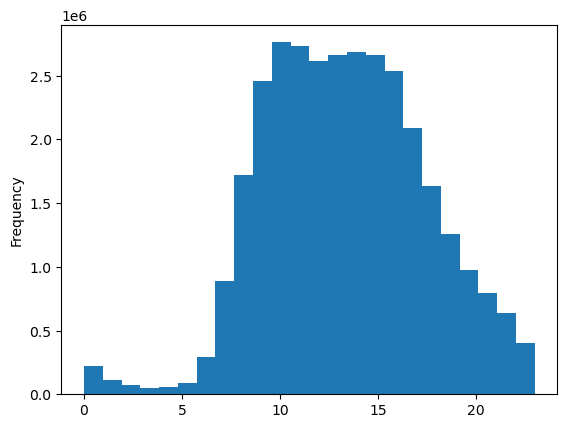

In [98]:
# Histogram for 'order_hour_of_day' column - Exercise 4.9 part 2.3
hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows that the majority of orders is made during the day between 9am and 5pm, i.e. during working hours for most people. Very few orders are made at night, between midnight and 5am. The best time for any website maintenance would be between 3am and 4am.

In [100]:
# Exporting 'order_hour_of_day' histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hours.png'))

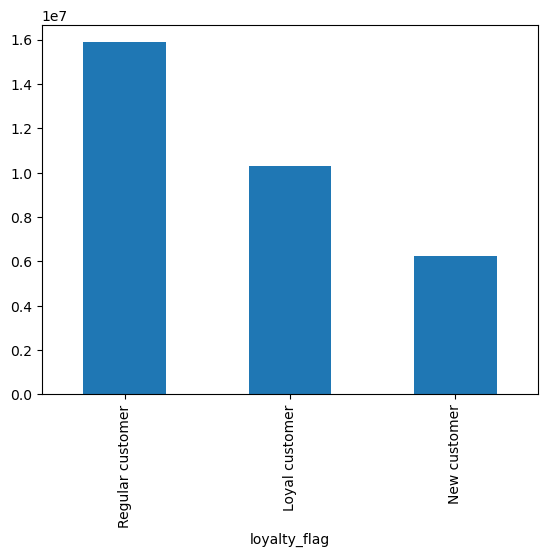

In [9]:
# Bar chart for different levels of loyalty - Exercise 4.9 part 2.4 
bar2 = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

In [12]:
# Exporting the bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag2.png'), bbox_inches='tight')

In [48]:
# Establish a representative sample of the merged database - Exercise 4.9 part 2.5

In [50]:
# Getting a set of random numbers from library 
np.random.seed(4)
# Create a list holding True/False values to the test np.random.rand() <= 0.7  
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [52]:
# Check the generated list
dev

array([False,  True, False, ..., False,  True,  True])

In [54]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [55]:
len(ords_prods_merge)

32399732

In [58]:
# Check that 'big' and 'small' dataframes together contain the same number of rows as the 'ords_prods_merge' dataframe
len(big)+len(small)

32399732

In [60]:
# Create a small dataframe with 30% of rows and only the 'order_hour_of_day' and 'prices' columns included
df = small[['order_hour_of_day','prices']]

In [62]:
df.shape

(9719609, 2)

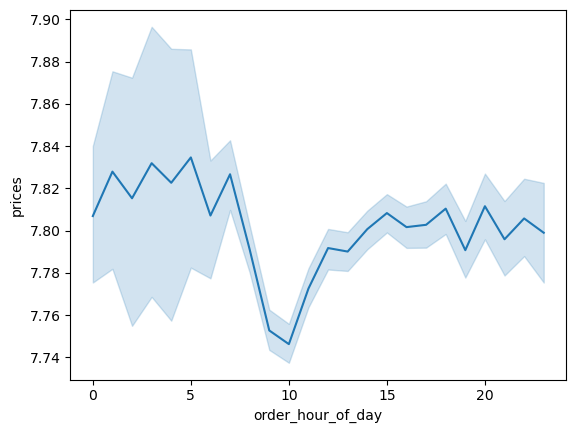

In [106]:
# Line chart for prices versus order hour of the day - Exercise 4.9 part 2.5 continued
line2 = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

In [108]:
# Exporting the order hour vs prices line chart
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_prices.png'))

End Exercise 4.9 part 2.5

In [71]:
# Line chart showing the relationship between age and number of dependents - Exercise 4.9 part 4.6
# Creating a sample dataframe for doing the line chart 

In [73]:
len(small)

9719609

In [75]:
df_age = small[['age','n_dependants']]

In [77]:
df_age.head()

,age,n_dependants
0,57,3
2,57,3
3,57,3
6,57,3
10,43,2


In [80]:
# Line chart age versus number of dependents

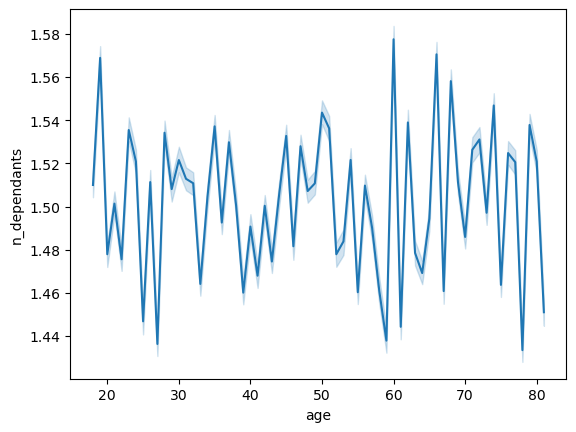

In [79]:
line_age = sns.lineplot(data = df_age, x = 'age',y = 'n_dependants')

There is no clear relationship between age and number of dependents. Within each age decade there seems to be a lot of variation in the number of dependents reported. The only thing one could observe is that the variation in the number of dependents seems to be greatest in the 60 to 70 decade and probably smallest for the 40 to 50 decade. Since a random sample was taken, it is assumed that the relationship looks similar in the data file as a whole.   

In [110]:
# Exporting the age vs no of dependents line chart
line_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [112]:
# Scatterplot showing the relationship between age and spending power - Exercise 4.9 part 4.7
# Creating a sample dataframe for doing the scatterplot
df_income = small[['age','income']]

In [114]:
df_income.head()

,age,income
0,57,98119
2,57,98119
3,57,98119
6,57,98119
10,43,149831


In [120]:
# Scatterplot age versus income

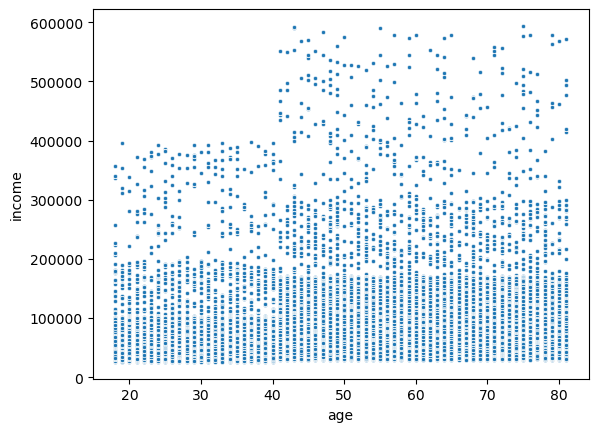

In [118]:
scatter_income = sns.scatterplot(x = 'age', y = 'income',data = df_income, marker='.')

The majority of people of all ages have an income of up to 200000. Some people between 20 and 40 years of age earn up to 400 000. There is a sizable group between 40 and 80 years old that earn 200000 to 300000. There are also some people in the 40-80 age group that earn between 300000 and 600000. It appears there are no younger people with earnings that high. Overall, a person in the 40-80 age group is more likely to earn more than a person in the 20-40 age group. However, within each of these two age groups there does not appear to be a correlation between age and income.  

In [124]:
# Exporting the age vs no of dependants line chart
scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))